In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg.csv")

Text(0.5, 1.0, 'Generation Time as a function of number of nodes')

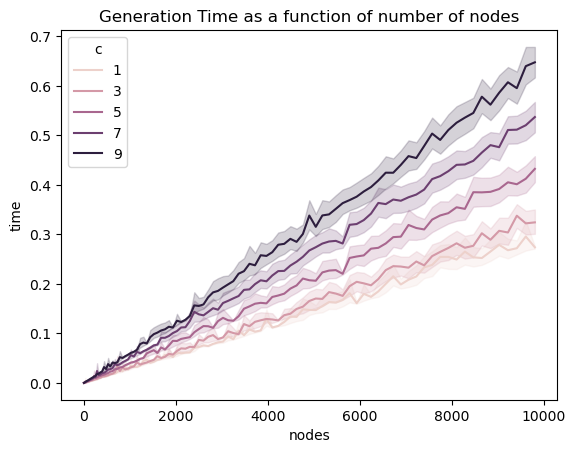

In [8]:
fig,ax=plt.subplots()
sns.lineplot(data=benchmark,x="nodes",y="time",hue="c",ax=ax)
ax.set_title("Generation Time as a function of number of nodes")

In [ ]:
fig,ax=plt.subplots()
sns.lineplot(data=benchmark,x="nodes",y="time",hue="c",ax=ax)
ax.set_title("Generation Time as a function of number of nodes")

<Axes: >

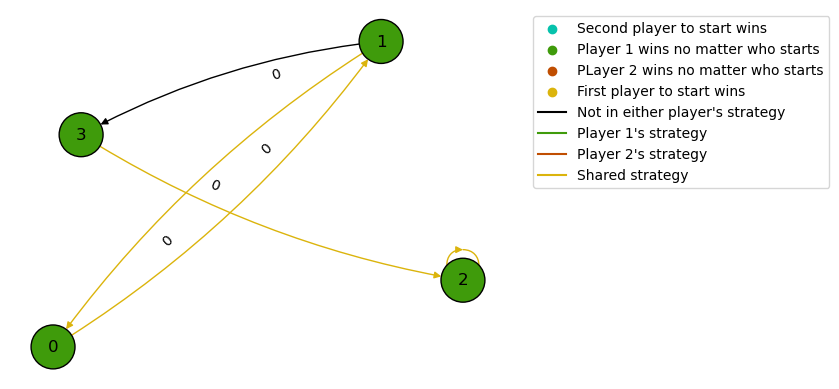

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import visualisation.game as vgame
import pickle
import games.mpg as mpg
import networkx as nx
graph=nx.read_weighted_edgelist("/run/media/ramizouari/INTENSO/MPG/dataset/gnp_uniform_mpg_4_1_0.edgelist.gz",create_using=mpg.MeanPayoffGraph,nodetype=int)
for e in graph.edges:
    for u in graph.edges[e]:
        graph.edges[e][u]=int(graph.edges[e][u])
fig,ax=plt.subplots()
visual_graph=vgame.MPGPlot(graph)
S1,S2=mpg.optimal_strategy_pair(graph)
visual_graph.set_node_color_mapping(vgame.WinnerVisualiser(graph,S1,S2))
visual_graph.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
visual_graph.plot(ax)

In [7]:
import os
import re
base_dir="/run/media/ramizouari/INTENSO/MPG/"
directory="/run/media/ramizouari/INTENSO/MPG/dataset"
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        extension=match.group(4)
    if n <=36:
        graph=nx.read_weighted_edgelist(os.path.join(directory,file),create_using=mpg.MeanPayoffGraph,nodetype=int)
        for e in graph.edges:
            for u in graph.edges[e]:
                graph.edges[e][u]=int(graph.edges[e][u])
        fig,ax=plt.subplots()
        visual_graph=vgame.MPGPlot(graph)
        S1,S2=mpg.optimal_strategy_pair(graph)
        visual_graph.set_node_color_mapping(vgame.WinnerVisualiser(graph,S1,S2))
        visual_graph.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
        visual_graph.plot(ax)
        fig.savefig(os.path.join(base_dir,"img",file.replace(match.group(4),".png")))
        plt.close(fig)

In [16]:
graph.edges[(0,1)]["weight"]

0.0

In [5]:
G=vgame.MPGVisualisation(graph)
G.set_node_color_mapping(vgame.WinnerVisualiser(graph,S1,S2))
G.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
G

MPGVisualisation(layout=Layout(height='500px', width='100%'))

In [130]:
mpg.mean_payoffs(graph,S1,S2)

{(3, True): 0.0,
 (0, 0): 0.0,
 (3, False): 0.0,
 (2, 1): 0.0,
 (2, False): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0}

In [136]:
 [visual_graph.edge_color_mapping(k,edge) for k,edge in enumerate(visual_graph.edges) ]

['#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000',
 '#000000']

In [1]:
edge=visual_graph.edges[2]
u=edge["start"]
v=edge["end"]
colour=vgame.Colour("#FF5555")
V=(visual_graph.edge_color_mapping.strategy1 is not None and v == visual_graph.edge_color_mapping.strategy1[u],
               visual_graph.edge_color_mapping.strategy2 is not None and v == visual_graph.edge_color_mapping.strategy2[u])
match V:
    case (True, True):
        colour = vgame.SHARED_COLOUR
        print(4)
        pass
    case (False, True):
        colour = vgame.PLAYER_2_COLOUR
        print(6)
        pass
    case (True, False):
        colour = vgame.PLAYER_1_COLOUR
        print(7)
        pass
    case (False,False):
        colour = vgame.EDGE_COLOUR
        pass
    case _ as ERR:
        print(ERR)
        pass
    
colour

NameError: name 'visual_graph' is not defined

In [217]:
(visual_graph.edge_color_mapping.strategy1 is not None and v == visual_graph.edge_color_mapping.strategy1[u],
               visual_graph.edge_color_mapping.strategy2 is not None and v == visual_graph.edge_color_mapping.strategy2[u])

(False, True)

True

In [161]:
visual_graph.edges

In [170]:
vgame.PLAYER_2_COLOUR
